In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

In [2]:
!pip install folium

In [3]:
import folium

# Location and Altitude of  All Airports 

In [4]:
data = pd.read_csv('df1.csv')
data

,Unnamed: 0,Airport,IATA,ICAO,Lat,Lon,Country,Alt
0,0,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
1,1,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
2,2,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
3,3,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
4,4,Aarhus Sea Airport,QEA,EKAC,56.151993,10.247725,Denmark,1
...,...,...,...,...,...,...,...,...
5090,5090,Zunyi Xinzhou Airport,ZYI,ZUZY,27.811167,107.245972,China,2723
5091,5091,Zurich Airport,ZRH,LSZH,47.464722,8.549167,Switzerland,1416
5092,5092,Zwara Airport,WAX,HLZW,32.933334,12.083333,Libya,9
5093,5093,Zweibrucken Airport,ZQW,EDRZ,49.209518,7.400647,Germany,1133


In [5]:
data.columns

Index(['Unnamed: 0', 'Airport', 'IATA', 'ICAO', 'Lat', 'Lon', 'Country',
       'Alt'],
      dtype='object')

In [6]:
# Column to delete
column_to_delete = 'Unnamed: 0'
data.drop(columns=column_to_delete, inplace=True)

In [7]:
# Creating a dictionary out of tree columns
# Specify the column names for the key and value columns
key_column = 'Airport'  # Replace with the actual column name for keys
lat_column = 'Lat'  # Replace with the actual column name for latitude values
lon_column = 'Lon'  # Replace with the actual column name for longitude values
alt_column = 'Alt'  # Replace with the actual column name for Altitude values

# Create an empty dictionary
airport_data = {}

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    airport = row[key_column]
    lat = row[lat_column]
    lon = row[lon_column]
    alt = row[alt_column]
    
    # Add the airport and its coordinates to the dictionary
    airport_data[airport] = {'Lat': lat, 'Lon': lon,'Alt': alt}
airport_data

{'A Coruna Airport': {'Lat': 43.302059, 'Lon': -8.37725, 'Alt': 326},
 'Aachen Merzbruck Airport': {'Lat': 50.823051, 'Lon': 6.186111, 'Alt': 623},
 'Aalborg Airport': {'Lat': 57.092781, 'Lon': 9.849164, 'Alt': 10},
 'Aarhus Airport': {'Lat': 56.300011, 'Lon': 10.619, 'Alt': 82},
 'Aarhus Sea Airport': {'Lat': 56.151993, 'Lon': 10.247725, 'Alt': 1},
 'Aasiaat Airport': {'Lat': 68.72184, 'Lon': -52.784698, 'Alt': 74},
 'Abadan Airport': {'Lat': 30.371111, 'Lon': 48.228329, 'Alt': 19},
 'Abakan International Airport': {'Lat': 53.740002,
  'Lon': 91.385002,
  'Alt': 831},
 'Abbotsford International Airport': {'Lat': 49.025269,
  'Lon': -122.360001,
  'Alt': 195},
 'Aberdeen International Airport': {'Lat': 57.201939,
  'Lon': -2.19777,
  'Alt': 215},
 'Aberdeen Regional Airport': {'Lat': 45.439999,
  'Lon': -98.419998,
  'Alt': 1302},
 'Abha Regional Airport': {'Lat': 18.24036, 'Lon': 42.65662, 'Alt': 6858},
 'Abidjan Port Bouet Airport': {'Lat': 5.261386, 'Lon': -3.92629, 'Alt': 21},
 'Ab

In [8]:
# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(airport_data, orient='index')

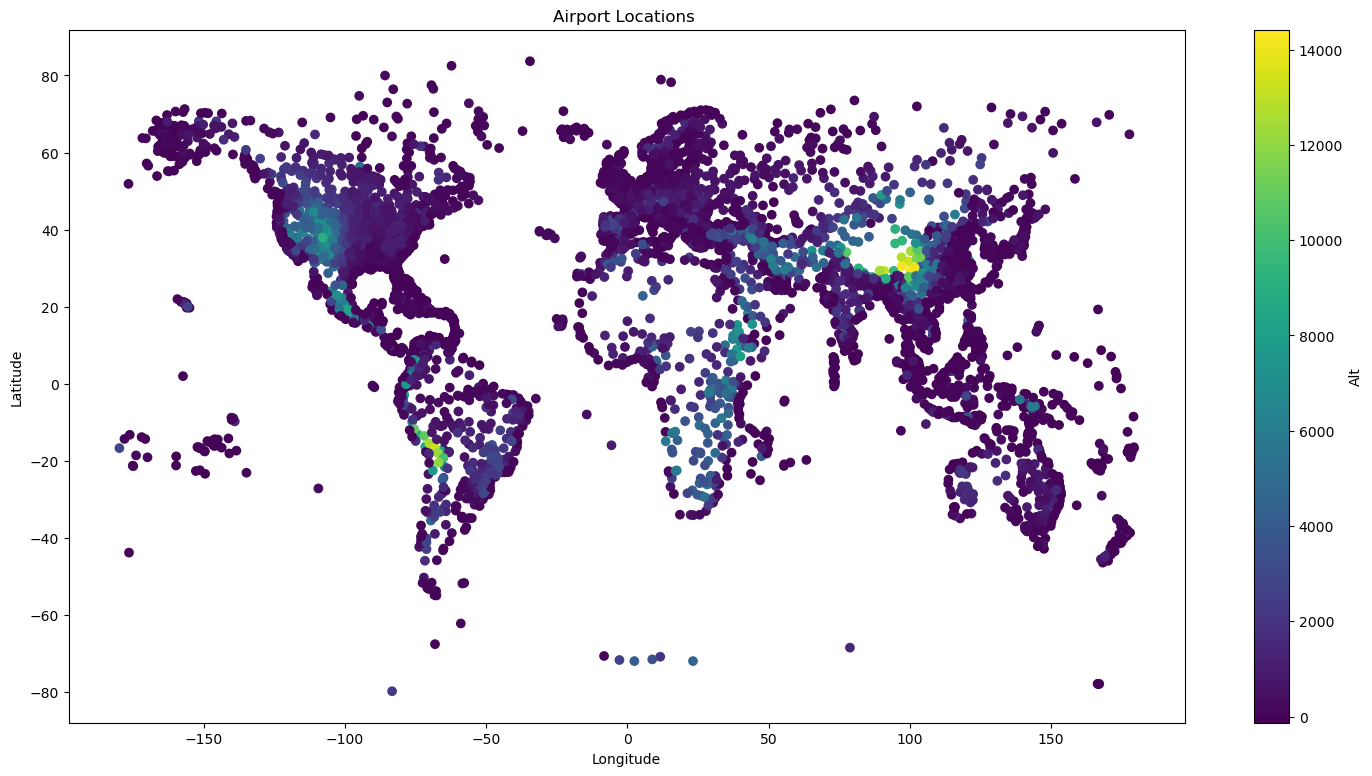

In [9]:
# Plot the data on a scatter plot with a larger figure size
plt.figure(figsize=(18, 9))  

# Plot the data on a scatter plot
plt.scatter(df['Lon'], df['Lat'], c=df['Alt'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airport Locations ')
plt.colorbar(label='Alt')

# Display the plot
plt.show()

# Top 10 Airports ranked by the Altitude

In [10]:
# Airports ranked by the Altitude
top_10 = data.nlargest(10, 'Alt')
top_10

,Airport,IATA,ICAO,Lat,Lon,Country,Alt
1067,Daocheng Yading Airport,DCY,ZUDC,29.323055,100.053329,China,14418
3644,Qamdo Bamda Airport,BPX,ZUBD,30.553610,97.108330,China,14219
2037,Kangding Airport,KGT,ZUKD,30.131760,101.747536,China,13916
1468,Garze Gesar Airport,GZG,ZUGZ,31.757500,99.554169,China,13346
2324,La Paz El Alto International Airport,LPB,SLLP,-16.513300,-68.192200,Bolivia,13325
2456,Lhasa Gonggar Airport,LXA,ZULS,29.297770,90.911942,China,13136
3571,Potosi Captain Nicolas Rojas Airport,POI,SLPO,-19.542959,-65.723442,Bolivia,12842
5049,Yushu Batang Airport,YUS,ZLYS,32.839466,97.037788,China,12786
1988,Juliaca Inca Manco Capac International Airport,JUL,SPJL,-15.467100,-70.158096,Peru,12552
4132,Shigatse Peace Airport,RKZ,ZURK,29.351944,89.309998,China,12467


In [11]:
# Creating a dictionary from tree columns
# Specify the column names for the key and value columns
key_column = 'Airport'  # Replace with the actual column name for keys
lat_column = 'Lat'  # Replace with the actual column name for latitude values
lon_column = 'Lon'  # Replace with the actual column name for longitude values
alt_column = 'Alt'  # Replace with the actual column name for Altitude values

# Create an empty dictionary
airport_data2 = {}

# Iterate over the rows of the DataFrame
for index, row in top_10.iterrows():
    airport = row[key_column]
    lat = row[lat_column]
    lon = row[lon_column]
    alt = row[alt_column]
    
    # Add the airport and its coordinates to the dictionary
    airport_data2[airport] = {'Lat': lat, 'Lon': lon,'Alt': alt}
airport_data2

{'Daocheng Yading Airport': {'Lat': 29.323055,
  'Lon': 100.053329,
  'Alt': 14418},
 'Qamdo Bamda Airport': {'Lat': 30.55361, 'Lon': 97.10833, 'Alt': 14219},
 'Kangding Airport': {'Lat': 30.13176, 'Lon': 101.747536, 'Alt': 13916},
 'Garze Gesar Airport': {'Lat': 31.7575, 'Lon': 99.554169, 'Alt': 13346},
 'La Paz El Alto International Airport': {'Lat': -16.5133,
  'Lon': -68.1922,
  'Alt': 13325},
 'Lhasa Gonggar Airport': {'Lat': 29.29777, 'Lon': 90.911942, 'Alt': 13136},
 'Potosi Captain Nicolas Rojas Airport': {'Lat': -19.542959,
  'Lon': -65.723442,
  'Alt': 12842},
 'Yushu Batang Airport': {'Lat': 32.839466, 'Lon': 97.037788, 'Alt': 12786},
 'Juliaca Inca Manco Capac International Airport': {'Lat': -15.4671,
  'Lon': -70.158096,
  'Alt': 12552},
 'Shigatse Peace Airport': {'Lat': 29.351944, 'Lon': 89.309998, 'Alt': 12467}}

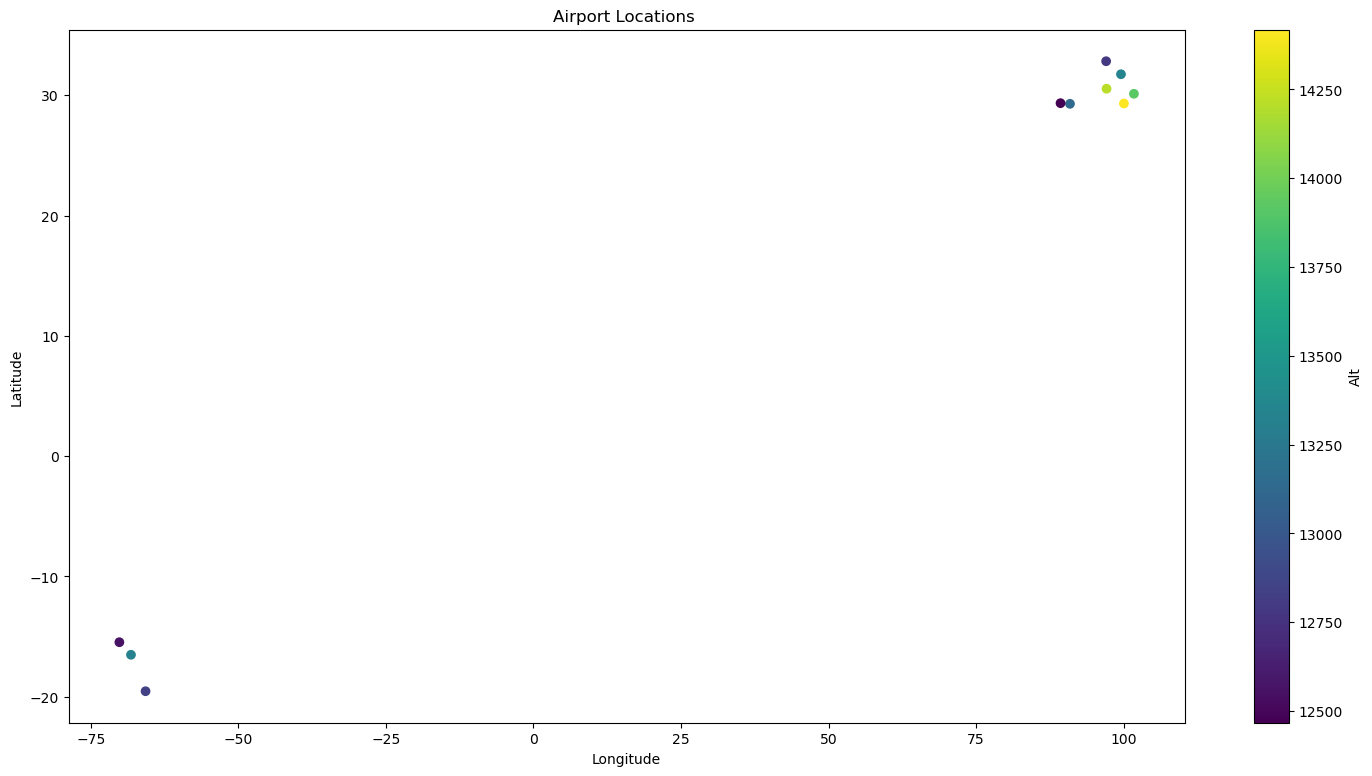

In [12]:
# Create a DataFrame from the dictionary
df2 = pd.DataFrame.from_dict(airport_data2, orient='index')

# Plot the data on a scatter plot with a larger figure size
plt.figure(figsize=(18, 9))  

# Plot the data on a scatter plot
plt.scatter(df2['Lon'], df2['Lat'], c=df2['Alt'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airport Locations ')
plt.colorbar(label='Alt')

# Display the plot
plt.show()

In [13]:
# Create a Folium map centered at the mean latitude and longitude
map_center = [top_10['Lat'].mean(), top_10['Lon'].mean()]
folium_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each airport location
for index, row in top_10.iterrows():
    airport = row['Airport']
    lat = row['Lat']
    lon = row['Lon']
    
    folium.Marker([lat, lon], popup=airport).add_to(folium_map)

# Display the map
folium_map

In [56]:
# Store values from the 'Alt' column into a list
values = top_10['Alt'].tolist()
values

[14418, 14219, 13916, 13346, 13325, 13136, 12842, 12786, 12552, 12467]

In [57]:
# Store values from the Airport column
values2 = top_10['Airport'].tolist()
values2

['Daocheng Yading Airport',
 'Qamdo Bamda Airport',
 'Kangding Airport',
 'Garze Gesar Airport',
 'La Paz El Alto International Airport',
 'Lhasa Gonggar Airport',
 'Potosi Captain Nicolas Rojas Airport',
 'Yushu Batang Airport',
 'Juliaca Inca Manco Capac International Airport',
 'Shigatse Peace Airport']

In [16]:
# Create a list of labels for the x-axis 
labels = ['Airport 1', 'Airport 2', 'Airport 3', 'Airport 4', 'Airport 5',
          'Airport 6', 'Airport 7', 'Airport 8', 'Airport 9', 'Airport 10']

In [58]:
# Create a list of indices for the x-axis ticks
x = range(len(values))

# Assuming you have a list of colors for the bars
colors = ['black', 'teal', 'red', 'orange', 'purple',
          'blue', 'pink', 'steelblue', 'brown', 'yellow']

<function matplotlib.pyplot.show(close=None, block=None)>

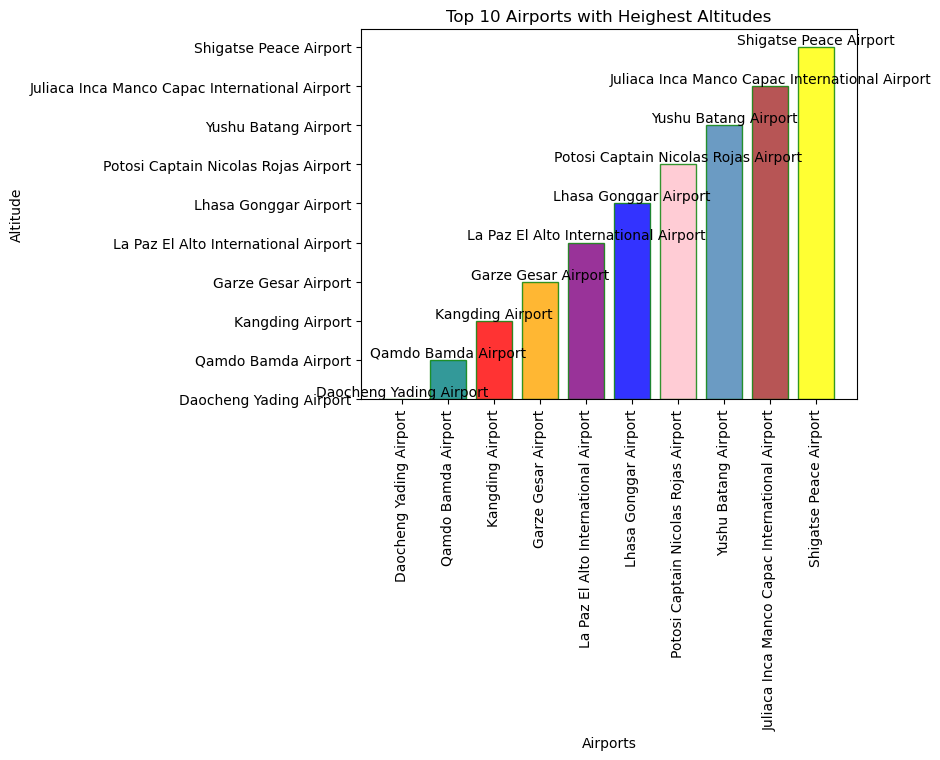

In [59]:
# Create a bar chart
plt.bar(x, values2, alpha=0.8, color=colors, edgecolor='green')

# Customize the x-axis labels
plt.xticks(x, values2, rotation='vertical')

# Add text to the bars
for i, altitude in enumerate(values2):
    plt.text(x[i], altitude, str(altitude), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Airports')
plt.ylabel('Altitude')
plt.title('Top 10 Airports with Heighest Altitudes')

plt.show

# 10 Airports with Lowest Altitudes

In [60]:
# Airports ranked by the smallest altitude
bottom_10 = data.nsmallest(10, 'Alt')
bottom_10

,Airport,IATA,ICAO,Lat,Lon,Country,Alt
594,Brawley Municipal Airport,BWC,KBWC,32.992901,-115.516998,United States,-128
4504,Thermal Jacqueline Cochran Regional Airport,TRM,KTRM,33.626884,-116.155937,United States,-128
268,Atyrau Airport,GUW,UATG,47.121941,51.821381,Kazakhstan,-72
1831,Imperial County Airport,IPL,KIPL,32.834785,-115.574524,United States,-62
3181,Noshahr Airport,NSH,OINN,36.663300,51.464699,Iran,-61
2383,Lankaran International Airport,LLK,UBBL,38.742031,48.824093,Azerbaijan,-50
1538,Gorgan Airport,GBT,OING,36.909401,54.401299,Iran,-24
2438,Lelystad Airport,LEY,EHLE,52.460300,5.527220,Netherlands,-13
3151,Norden Norddeich Airport,NOD,EDWS,53.633007,7.190385,Germany,-6
159,Anglesey Airport,VLY,EGOV,53.240002,-4.530000,United Kingdom,-1


In [61]:
# Store values from the 'Alt' column into a list
values3 = bottom_10['Alt'].tolist()
values3

[-128, -128, -72, -62, -61, -50, -24, -13, -6, -1]

In [62]:
# Store values from the Airport column
values4 = bottom_10['Airport'].tolist()
values4

['Brawley Municipal Airport',
 'Thermal Jacqueline Cochran Regional Airport',
 'Atyrau Airport',
 'Imperial County Airport',
 'Noshahr Airport',
 'Lankaran International Airport',
 'Gorgan Airport',
 'Lelystad Airport',
 'Norden Norddeich Airport',
 'Anglesey Airport']

In [63]:
# Create a list of labels for the x-axis 
labels2 = ['Airport 1', 'Airport 2', 'Airport 3', 'Airport 4', 'Airport 5',
          'Airport 6', 'Airport 7', 'Airport 8', 'Airport 9', 'Airport 10']

In [64]:
# Create a list of indices for the x-axis ticks
a = range(len(values3))

# Assuming you have a list of colors for the bars
colors2 = ['steelblue', 'green', 'red', 'orange', 'purple',
          'blue', 'pink', 'yellow', 'brown', 'teal']

<function matplotlib.pyplot.show(close=None, block=None)>

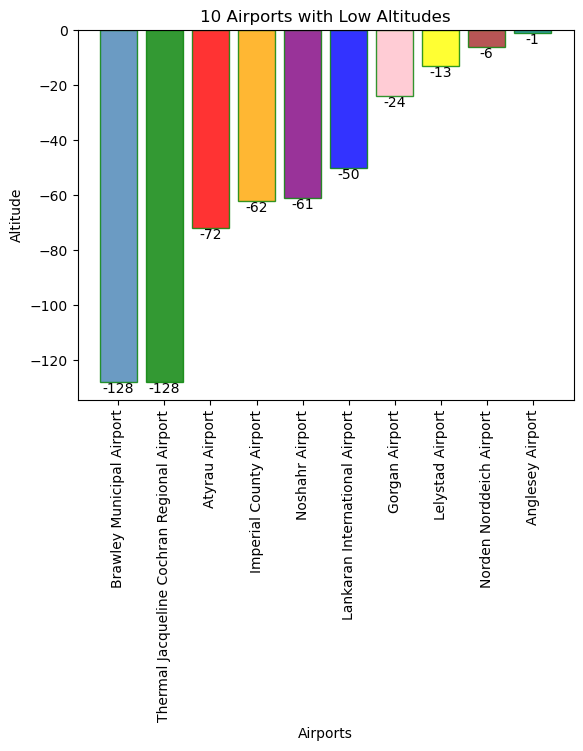

In [65]:
# Create a bar chart
plt.bar(a, values3, alpha=0.8, color=colors2, edgecolor='green')

# Customize the x-axis labels
plt.xticks(a, values4, rotation='vertical')

# Add text to the bars
for k, altitude in enumerate(values3):
    plt.text(a[k], altitude, str(altitude), ha='center', va='top')

# Add labels and title
plt.xlabel('Airports')
plt.ylabel('Altitude')
plt.title('10 Airports with Low Altitudes')

plt.show

# Top 10 Largest Areas Airports

In [74]:
data2 = pd.read_csv('df2.csv')
data2

,Unnamed: 0,Airport,City,Country,Square km,Square mi
0,0,King Fahd International (DMM),"Dammam,",Saudi Arabia,776.0,299.61
1,1,Denver International (DEN),"Denver,",CO United States,135.7,53.09
2,2,Dallas/Fort Worth International (DFW),"Dallas,",TX United States,69.6,26.88
3,3,Orlando International (MCO),"Orlando,",FL United States,53.8,20.78
4,4,Washington Dulles International (IAD),Washington,"D.C., United States",48.6,18.75
5,5,Beijing Daxing International (PKX),"Beijing,",China,46.6,18.00
6,6,George Bush Intercontinental (IAH),"Houston,",TX United States,44.5,17.19
7,7,Shanghai Pudong International (PVG),"Shanghai,",China,39.9,15.40
8,8,Cairo International (CAI),"Cairo,",Egypt,36.3,14.00
9,9,Suvarnabhumi International (BKK),Bangkok,", Thailand",32.4,12.51


In [75]:
# column to delete
column_to_delete_2 = 'Unnamed: 0'
data2.drop(columns=column_to_delete_2, inplace=True)

In [76]:
data2

,Airport,City,Country,Square km,Square mi
0,King Fahd International (DMM),"Dammam,",Saudi Arabia,776.0,299.61
1,Denver International (DEN),"Denver,",CO United States,135.7,53.09
2,Dallas/Fort Worth International (DFW),"Dallas,",TX United States,69.6,26.88
3,Orlando International (MCO),"Orlando,",FL United States,53.8,20.78
4,Washington Dulles International (IAD),Washington,"D.C., United States",48.6,18.75
5,Beijing Daxing International (PKX),"Beijing,",China,46.6,18.00
6,George Bush Intercontinental (IAH),"Houston,",TX United States,44.5,17.19
7,Shanghai Pudong International (PVG),"Shanghai,",China,39.9,15.40
8,Cairo International (CAI),"Cairo,",Egypt,36.3,14.00
9,Suvarnabhumi International (BKK),Bangkok,", Thailand",32.4,12.51


In [77]:
data2.columns

Index(['Airport', 'City', 'Country', 'Square km', 'Square mi'], dtype='object')

In [80]:
# Creating Pie chart
# Store values from the 'Alt' column into a list
square_km = data2['Square km'].tolist()
square_km

[776.0, 135.7, 69.6, 53.8, 48.6, 46.6, 44.5, 39.9, 36.3, 32.4]

In [81]:
# Store values from the 'Alt' column into a list
airport_km = data2['Airport'].tolist()
airport_km

['King Fahd International (DMM)',
 'Denver International (DEN)',
 'Dallas/Fort Worth International (DFW)',
 'Orlando International (MCO)',
 'Washington Dulles International (IAD)',
 'Beijing Daxing International (PKX)',
 'George Bush Intercontinental (IAH)',
 'Shanghai Pudong International (PVG)',
 'Cairo International (CAI)',
 'Suvarnabhumi International (BKK)']

In [82]:
# Create a list of indices for the x-axis ticks
b = range(len(square_km))

# Assuming you have a list of colors for the bars
colors2 = ['steelblue', 'green', 'red', 'orange', 'purple',
          'blue', 'pink', 'yellow', 'brown', 'teal']

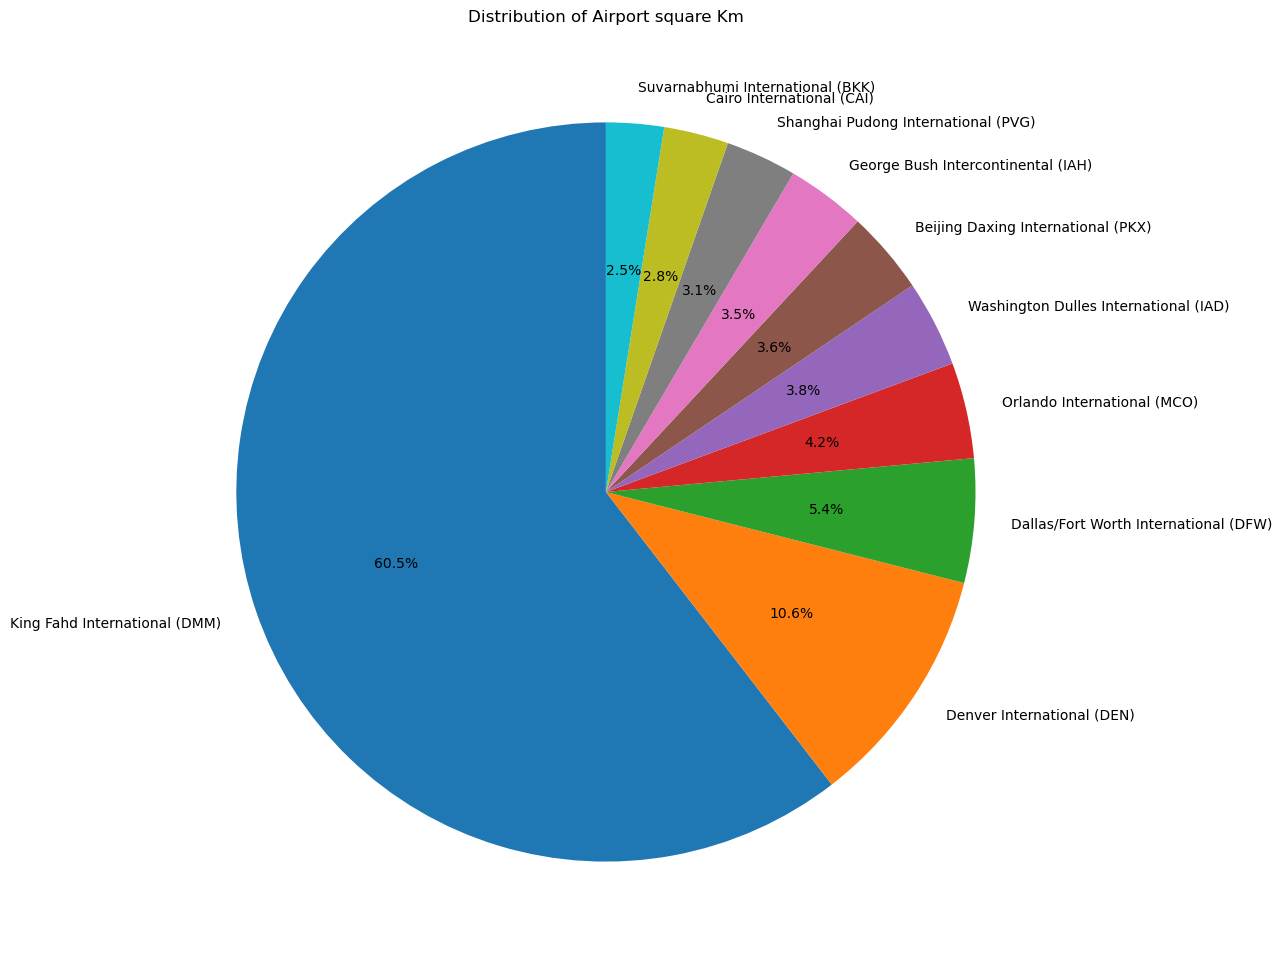

In [89]:
# Creating the pie chart
labels = airport_km
sizes = square_km  # Sizes or proportions for each category

# Set the figure size
plt.figure(figsize=(18, 12))  


# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Airport square Km')

# Display the chart
plt.show()

# Number of Total Passengers Per Airport

In [105]:
data3 = pd.read_csv('df3.csv')
data3

,Unnamed: 0,Airport,City,Country,Total_Passengers
0,0,Guangzhou Baiyun International Airport (CAN),"Guangzhou,",China,"43,767,558"
1,1,Hartsfield-Jackson Atlanta International Airpo...,"Atlanta,",GA United States,"42,918,685"
2,2,Chengdu Shuangliu International Airport (CTU),"Chengdu,",China,"40,741,509"
3,3,Dallas/Fort Worth International Airport (DFW),"Grapevine,",TX United States,"39,364,990"
4,4,Shenzhen Bao'an International Airport (SZX),"Shenzhen,",China,"37,916,054"
5,5,Chongqing Jiangbei International Airport (CKG),"Chongqing,",China,"34,937,789"
6,6,Beijing Capital International Airport (PEK) - ...,"Beijing,",China,"34,513,827"
7,7,"Denver International Airport (DEN) - Denver, C...","Denver,",CO United States,"33,741,129"
8,8,Kunming Changshui International Airport (KMG) ...,"Kunming,",China,"32,990,805"
9,9,Shanghai Hongqiao International Airport (SHA) ...,"Shanghai,",China,"31,165,641"


In [106]:
data3 = pd.read_csv('df3.csv')
data3.drop(columns=column_to_delete, inplace=True)
data3

,Airport,City,Country,Total_Passengers
0,Guangzhou Baiyun International Airport (CAN),"Guangzhou,",China,"43,767,558"
1,Hartsfield-Jackson Atlanta International Airpo...,"Atlanta,",GA United States,"42,918,685"
2,Chengdu Shuangliu International Airport (CTU),"Chengdu,",China,"40,741,509"
3,Dallas/Fort Worth International Airport (DFW),"Grapevine,",TX United States,"39,364,990"
4,Shenzhen Bao'an International Airport (SZX),"Shenzhen,",China,"37,916,054"
5,Chongqing Jiangbei International Airport (CKG),"Chongqing,",China,"34,937,789"
6,Beijing Capital International Airport (PEK) - ...,"Beijing,",China,"34,513,827"
7,"Denver International Airport (DEN) - Denver, C...","Denver,",CO United States,"33,741,129"
8,Kunming Changshui International Airport (KMG) ...,"Kunming,",China,"32,990,805"
9,Shanghai Hongqiao International Airport (SHA) ...,"Shanghai,",China,"31,165,641"


In [107]:
# Store values from the 'Total_Passengers' column into a list
airport3 = data3['Airport'].tolist()
airport3

['Guangzhou Baiyun International Airport (CAN)',
 'Hartsfield-Jackson Atlanta International Airport (ATL)',
 'Chengdu Shuangliu International Airport (CTU)',
 'Dallas/Fort Worth International Airport (DFW)',
 "Shenzhen Bao'an International Airport (SZX)",
 'Chongqing Jiangbei International Airport (CKG)',
 'Beijing Capital International Airport (PEK) - Beijing, China - 34,513,827',
 'Denver International Airport (DEN) - Denver, CO United States - 33,741,129',
 'Kunming Changshui International Airport (KMG) - Kunming, China - 32,990,805',
 'Shanghai Hongqiao International Airport (SHA) - Shanghai, China - 31,165,641']

In [104]:
# Store values from the 'Total_Passengers' column into a list
total_passengers = data3['Total_Passengers'].tolist()
# Convert the list of strings to floats, handling commas
for i in range(len(total_passengers)):
    total_passengers[i] = float(total_passengers[i].replace(',', '.'))
total_passengers

ValueError: could not convert string to float: '43.767.558'

ValueError: could not convert string to float: '43,767,558'

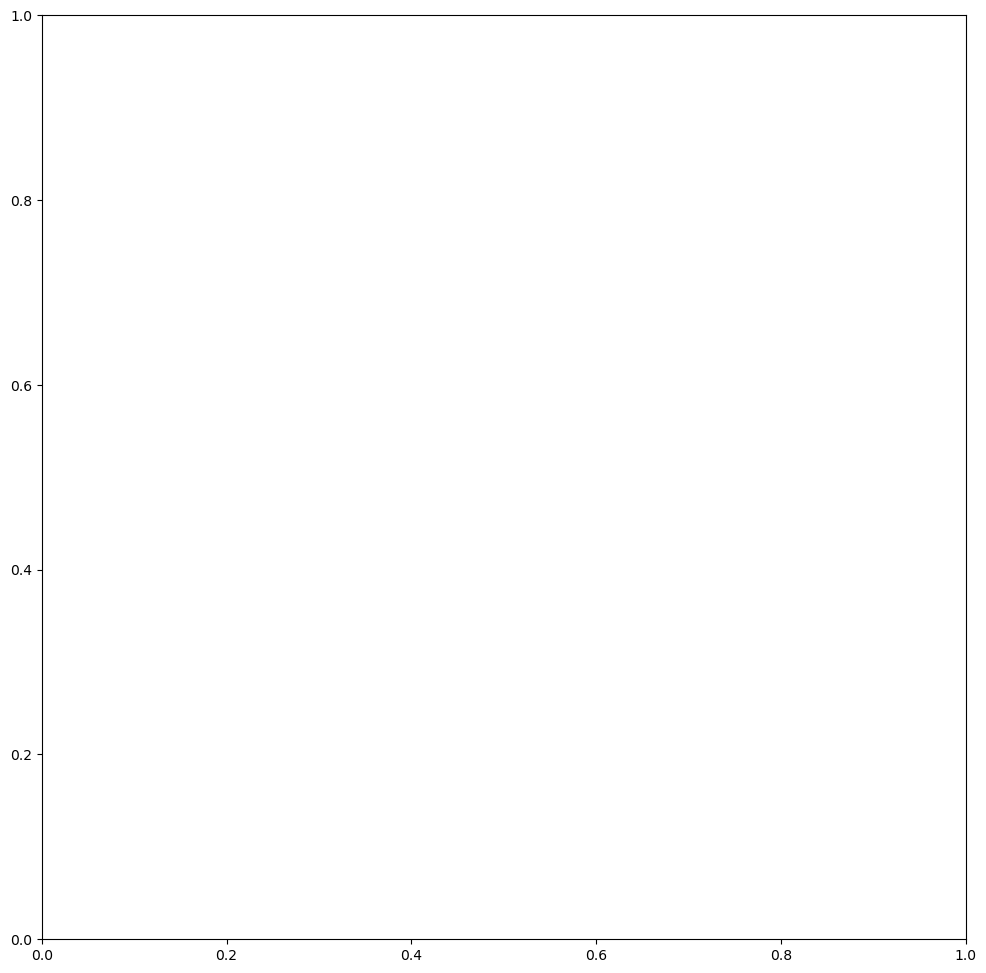

In [97]:
# Creating the pie chart
labels = airport3
sizes = total_passengers  # Sizes or proportions for each category

# Set the figure size
plt.figure(figsize=(18, 12))  


# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Total Passengers')

# Display the chart
plt.show()

In [ ]:
# Merging the data
d=pd.merge(data1, 
           data2, 
           how='outer', 
           on= 'Airport')
d

In [ ]:
d1=pd.merge(d, 
           data3, 
           how='outer', 
           on='Airport')
d1

In [ ]:
all_data=pd.merge(d1, 
                  data3, 
                  how='outer', 
                  on='Airport')
all_data

In [ ]:
all_data.columns